# Load the Data

In [78]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

print("Feature Names:", wine.feature_names)
print("\nSample Data:")
print(wine_df.head(5))

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Sample Data:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81         

# Data Analysis / partial data preprocessing

* Describe features and target variable;  check for general characteristics of the dataset

In [79]:

print("Feature Descriptions:")
print(wine.DESCR)
print("\n\n\nTarget Variable:", wine.target_names)
print("\nThe data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators")
print("\nClass Distribution: class_0 (59), class_1 (71), class_2 (48)")

Feature Descriptions:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70

* Check for missing values



In [80]:
print("\nMissing Values:")
print(wine_df.isnull().sum())


Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


# **POPRAWA**- "nie usunełaś wartości odstające, ale następnie zaczełaś trenować model na starych danych"

* detecting outliers

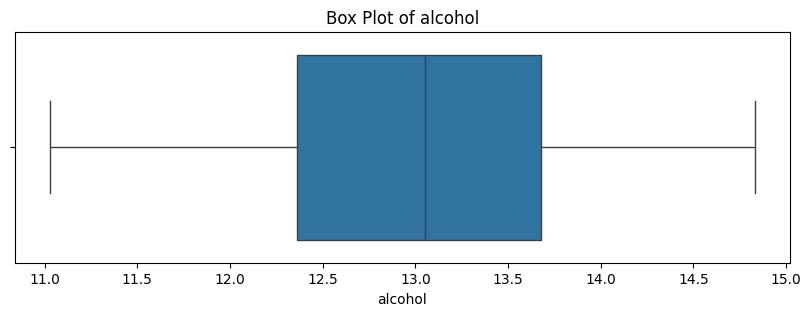

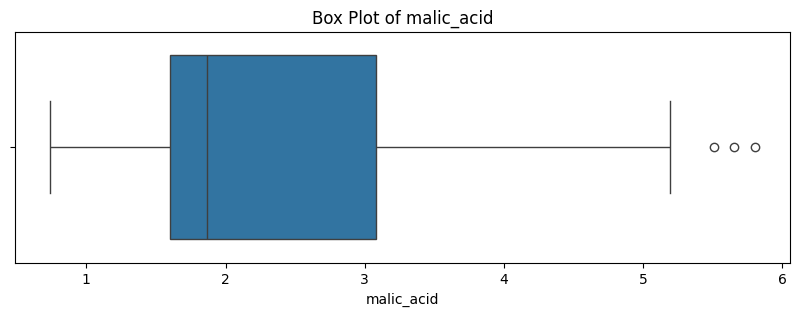

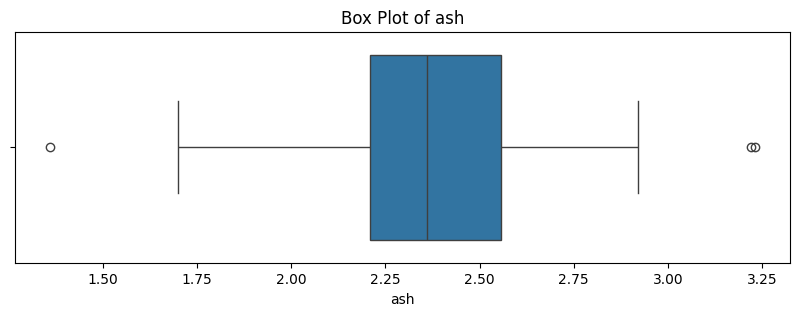

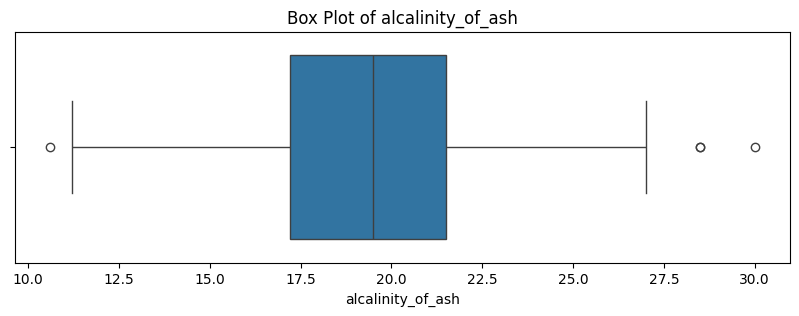

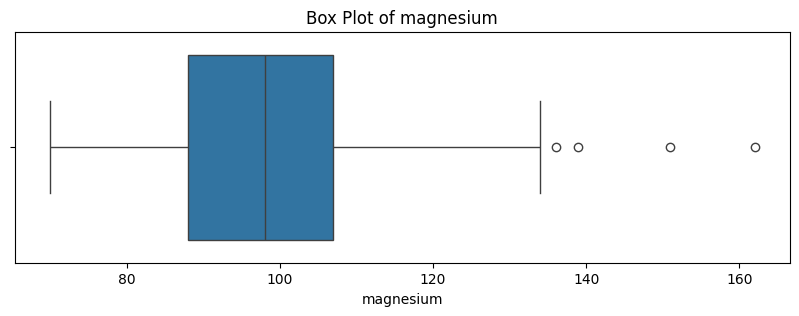

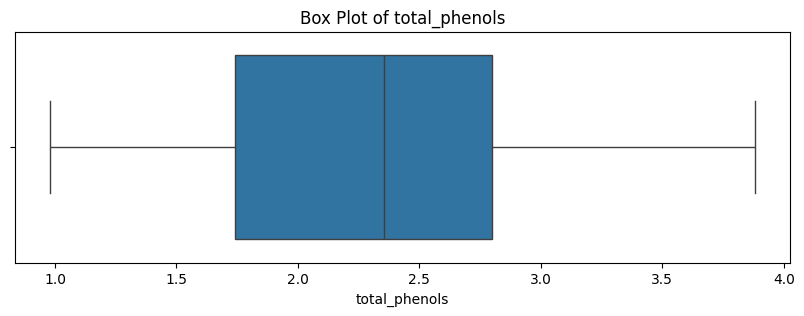

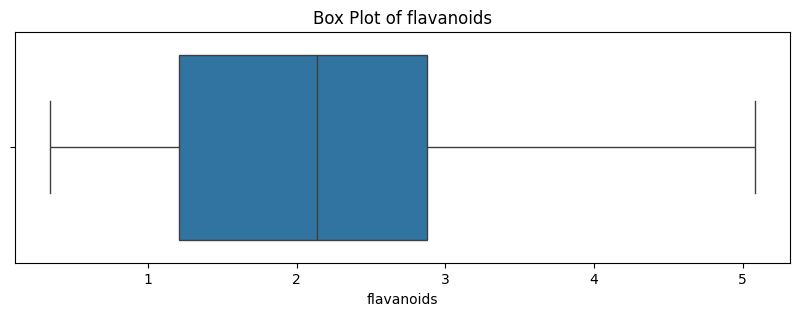

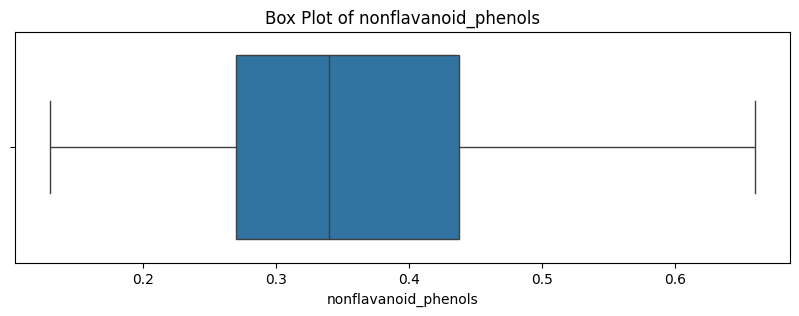

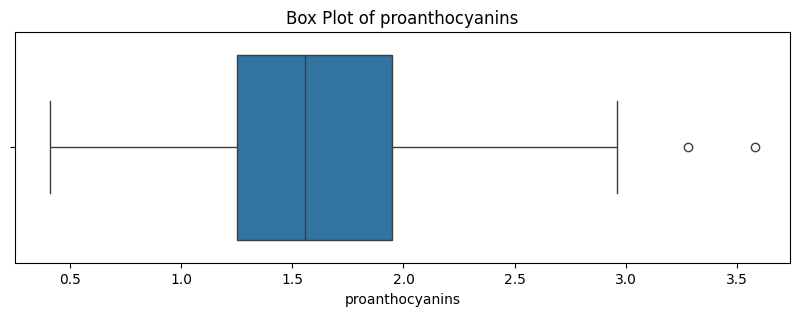

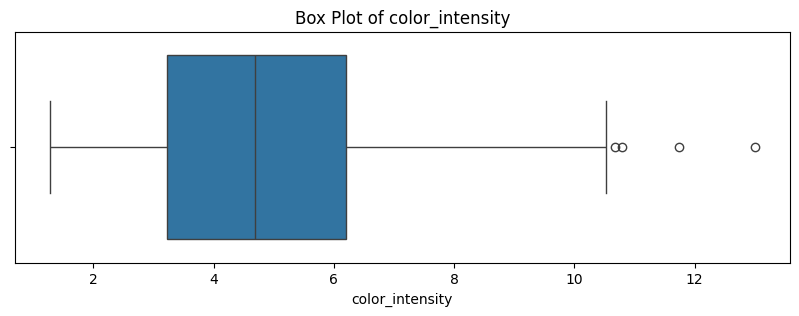

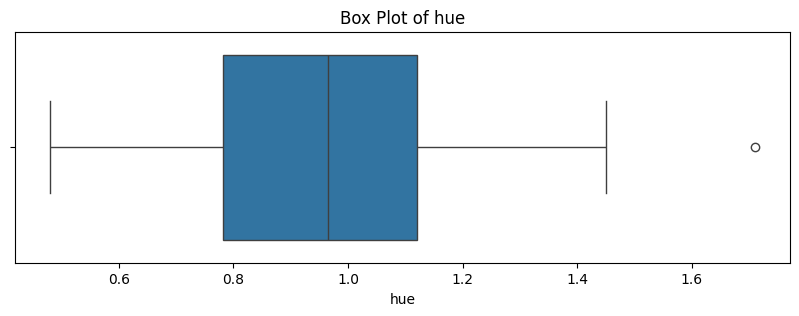

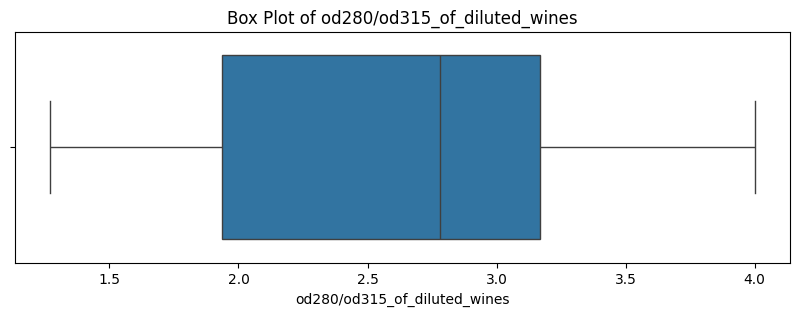

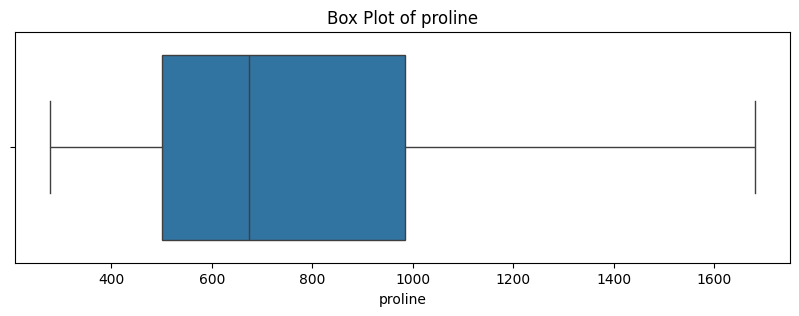

In [81]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'
import seaborn as sns
features= ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

for feature in features:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=wine_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [82]:
import numpy as np
for feature in features:
    z_scores = np.abs((wine_df[feature] - wine_df[feature].mean()) / wine_df[feature].std())
    outliers = wine_df[(z_scores > 3)]
    print(f"\nOutliers in {feature}:")
    print(outliers)


Outliers in alcohol:
Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, target]
Index: []

Outliers in malic_acid:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
123    13.05         5.8  2.13               21.5       86.0           2.62   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
123        2.65                   0.3             2.01              2.6  0.73   

     od280/od315_of_diluted_wines  proline  target  
123                           3.1    380.0       1  

Outliers in ash:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
25     13.05        2.05  3.22               25.0      124.0           2.63   
59     12.37        0.94  1.36               10.6       88.0           1.98   
121    11.56        2.05  3.23             

* removing outliers

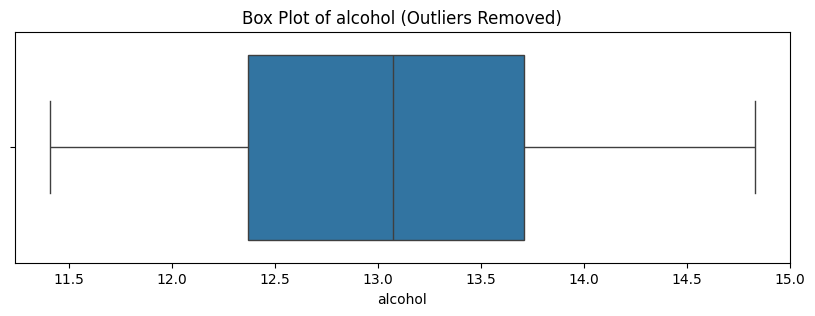

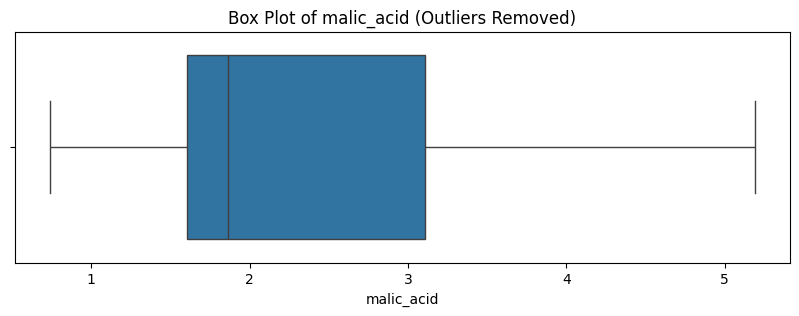

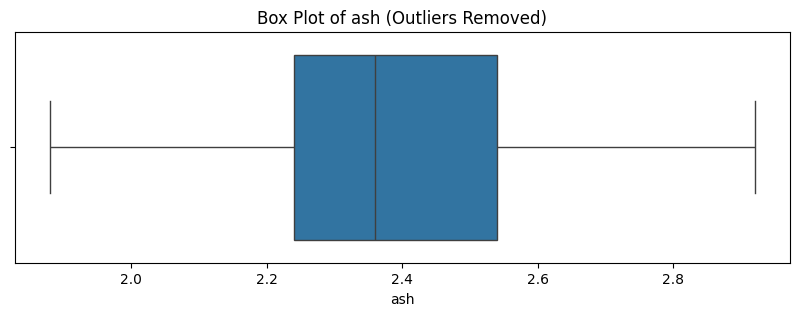

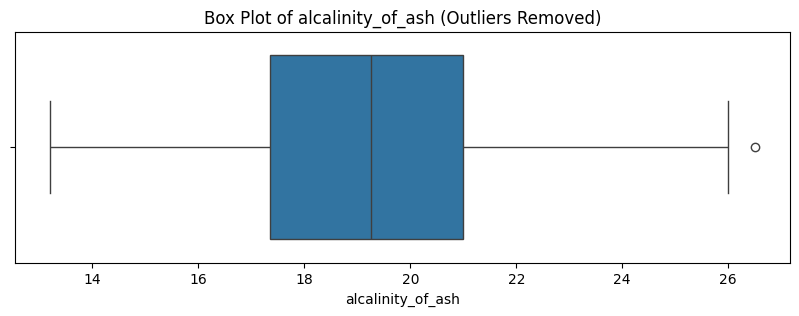

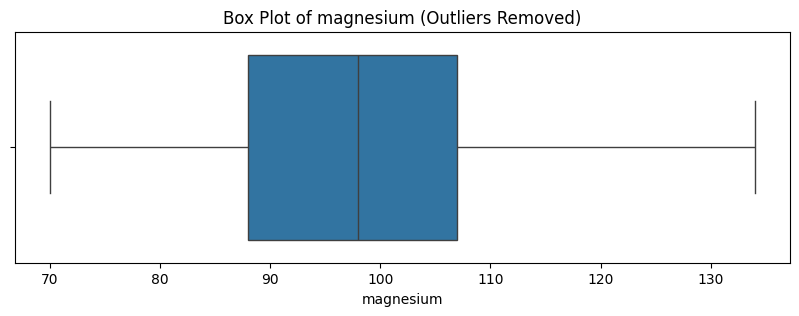

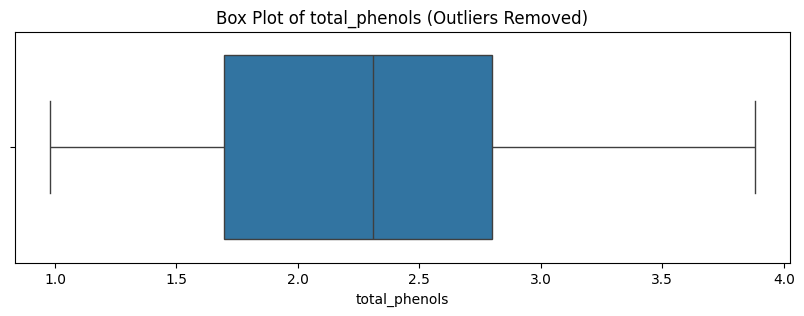

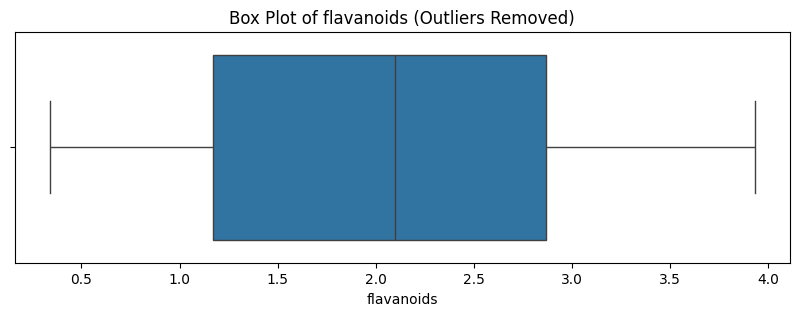

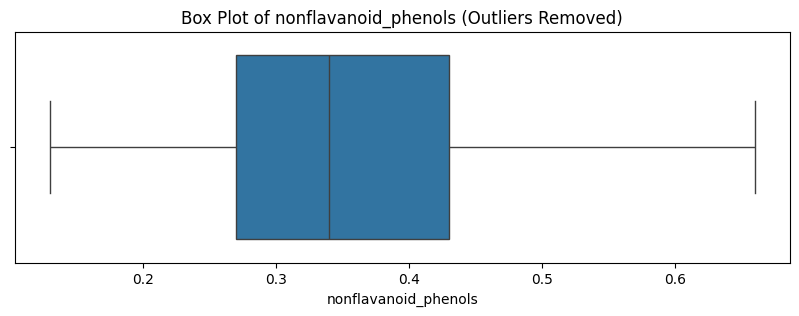

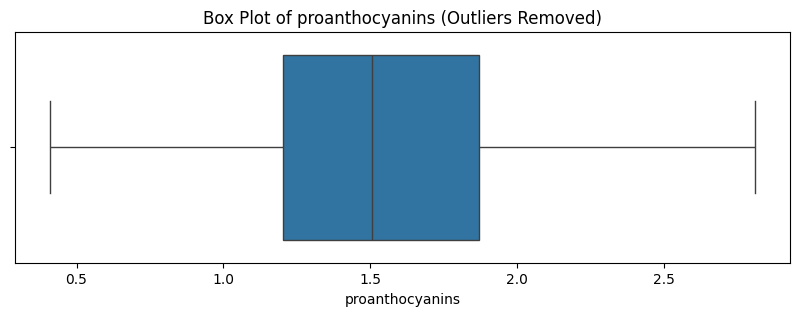

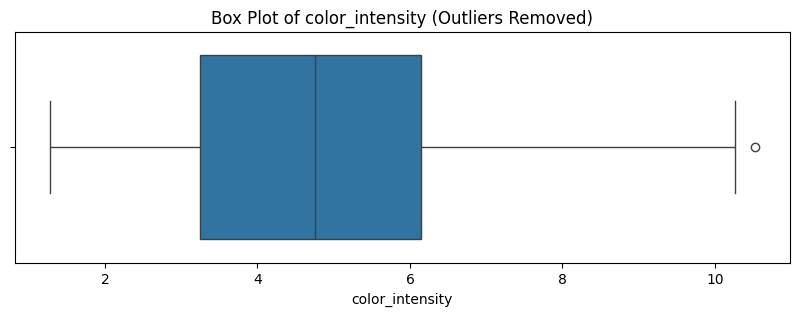

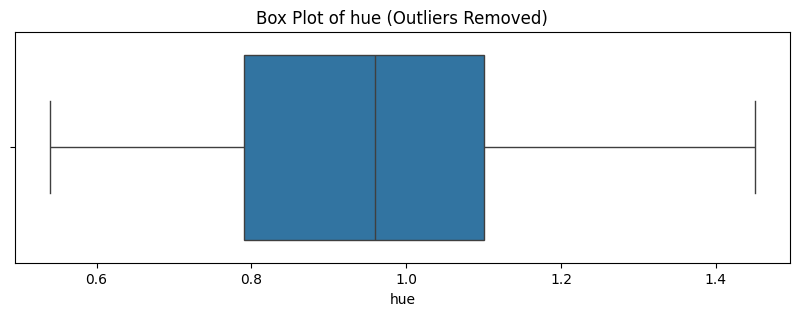

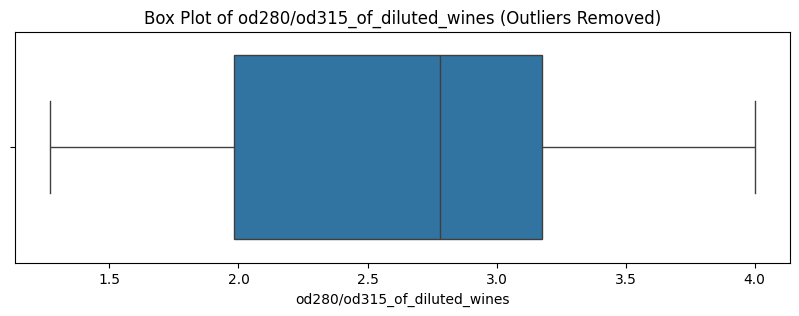

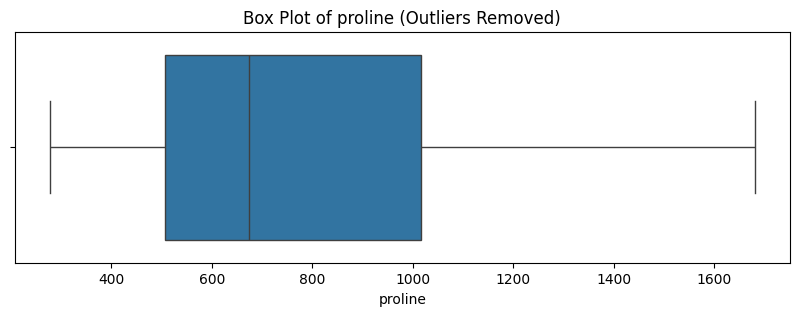

In [84]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for feature in features:
    wine_df = remove_outliers_iqr(df=wine_df, column=feature)

for feature in features:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=wine_df[feature])
    plt.title(f'Box Plot of {feature} (Outliers Removed)')
    plt.xlabel(feature)
    plt.show()



# **POPRAWA**-  "duplikaty należy usunąć przed data splitting  i normalizacją"

* Drop duplicates

In [85]:
wine_df.drop_duplicates(inplace=True)

# **POPRAWA**- "nie ma analizy równowagi klas; należy to również wziąć pod uwagę przy wyborze rozkładu w  naiwnym Bayes" (1/2)

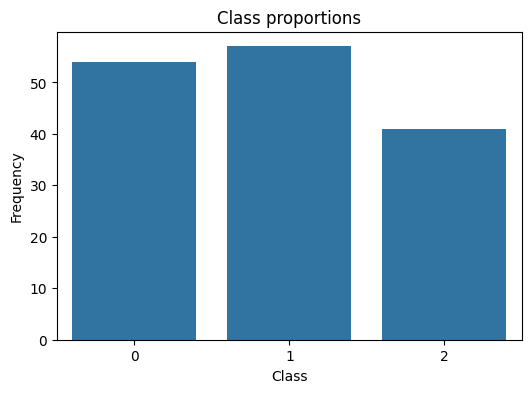

target
1    0.375000
0    0.355263
2    0.269737
Name: count, dtype: float64


In [86]:
class_distribution = wine_df['target'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=wine_df)
plt.title('Class proportions')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
class_proportions = class_distribution / len(wine_df)
print(class_proportions)

Observation: The distribution of classes in the dataset is relatively balanced

## **POPRAWA**-
- "Naiwny Bayes Gaussa nie działa dobrze ze skorelowanymi cechami, nie usunełaś ich"
- "nie ma analizy korelacji między cechami a funkcją docelową w celu usunięcia zbędnych cech" (zgodnie z Pani radą , nie odnoszę się do tego komentarza)

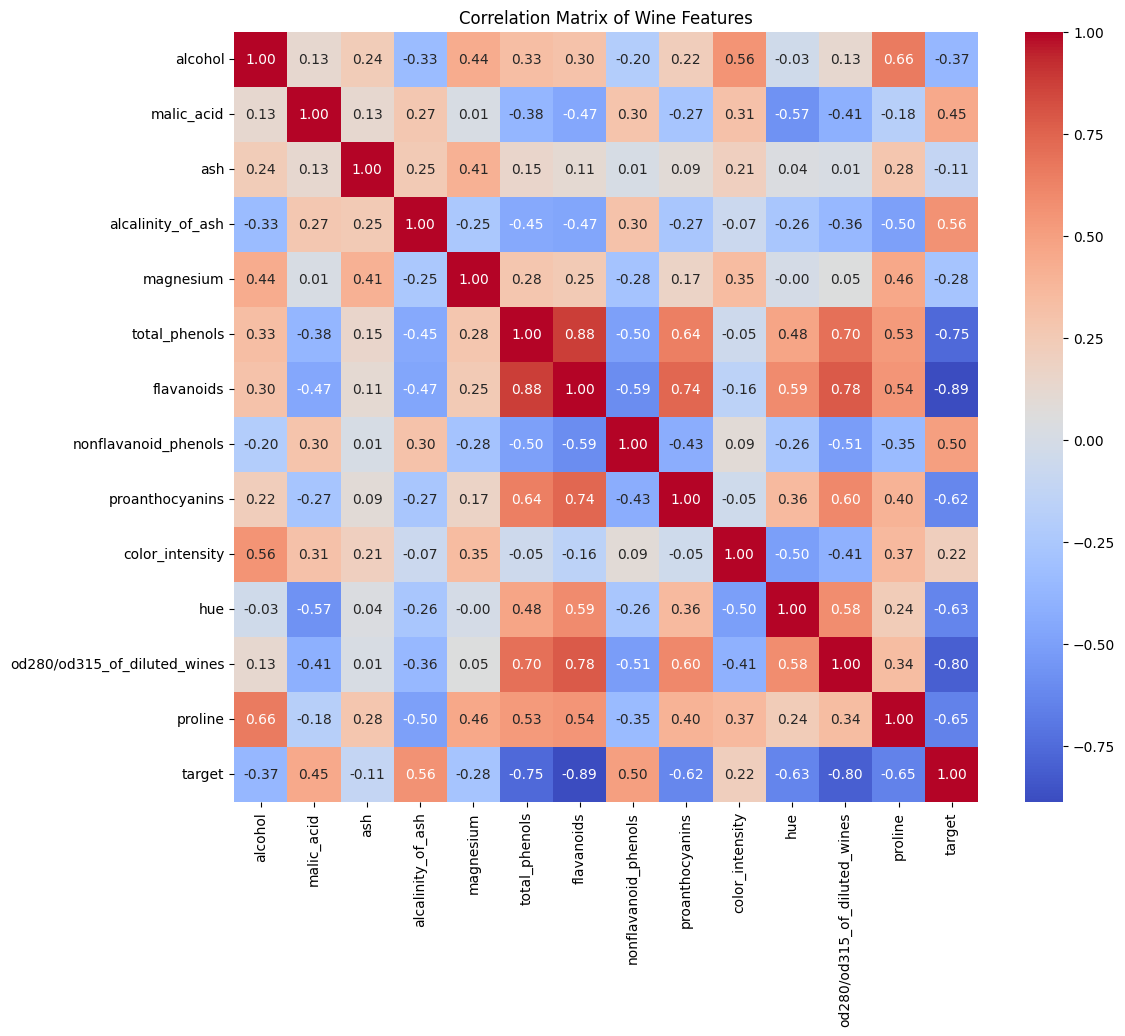

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = wine_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Features")
plt.show()

* strong correlation (>|0.87|):


In [88]:
high_corr_features = correlation_matrix[((correlation_matrix > 0.87) | (correlation_matrix < -0.87)) & (correlation_matrix !=1.0)]

highly_correlated_pairs = []
for feature1 in high_corr_features.columns:
    for feature2 in high_corr_features.index:
        if feature1 != feature2 and high_corr_features.loc[feature2, feature1] > 0.87:
            highly_correlated_pairs.append((feature1, feature2))

for pair in highly_correlated_pairs:
    print(pair)

('total_phenols', 'flavanoids')
('flavanoids', 'total_phenols')


* Removing highly correlated features

In [89]:
wine_df = wine_df.drop(['total_phenols'], axis=1) # flavanoids has higher correlation with the target (0.88) compared to total_phenols (0.75)

 * Perform a basic statistical summary

In [90]:

print(wine_df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  152.000000  152.000000  152.000000         152.000000  152.000000   
mean    13.036711    2.322105    2.377632          19.426974   98.940789   
std      0.790914    1.049754    0.226376           2.734038   12.466768   
min     11.410000    0.740000    1.880000          13.200000   70.000000   
25%     12.370000    1.607500    2.240000          17.350000   88.000000   
50%     13.075000    1.865000    2.360000          19.250000   98.000000   
75%     13.712500    3.105000    2.540000          21.000000  107.000000   
max     14.830000    5.190000    2.920000          26.500000  134.000000   

       flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
count  152.000000            152.000000       152.000000       152.000000   
mean     2.004605              0.361250         1.513750         4.995395   
std      0.974885              0.120393         0.488042         2.139957   
min    

# **POPRAWA**- "nie można powiedzieć, że istnieje rozkład normalny cech, jeśli zilustrowano tylko trzy ze wszystkich" (1/2)

* visualize the distributions of a few features.

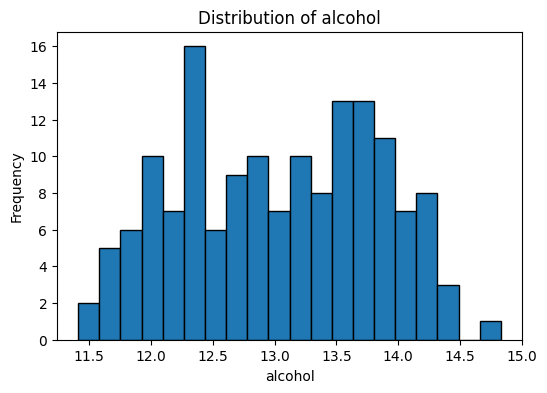

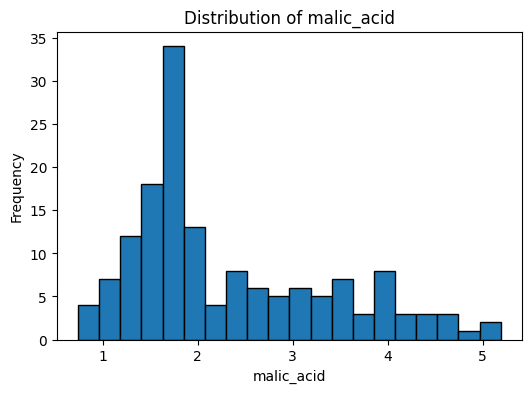

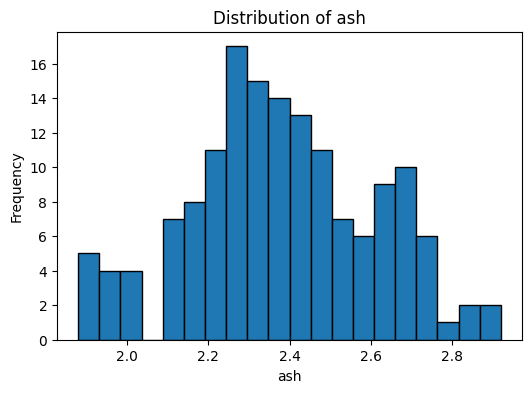

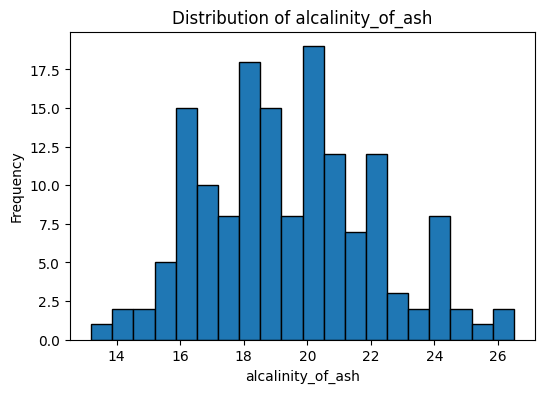

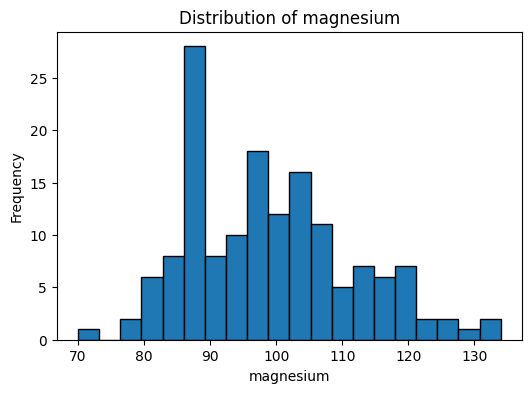

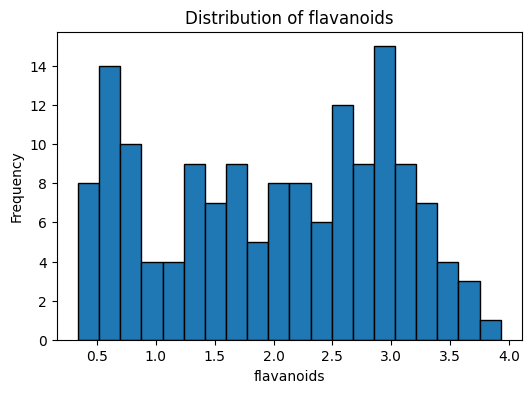

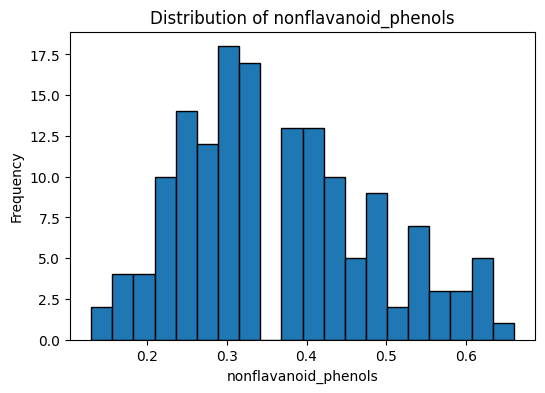

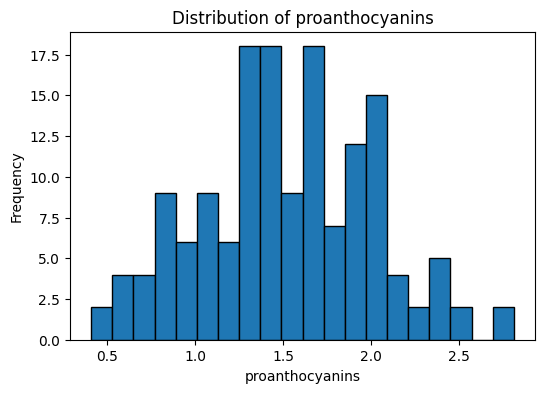

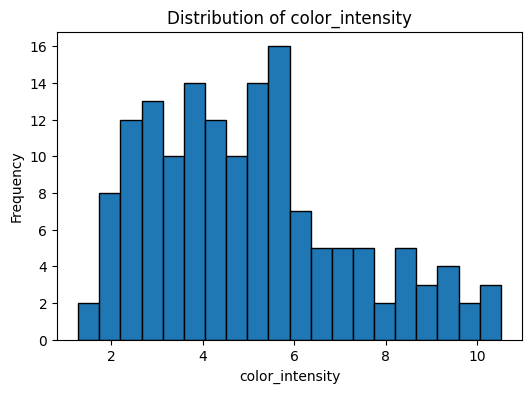

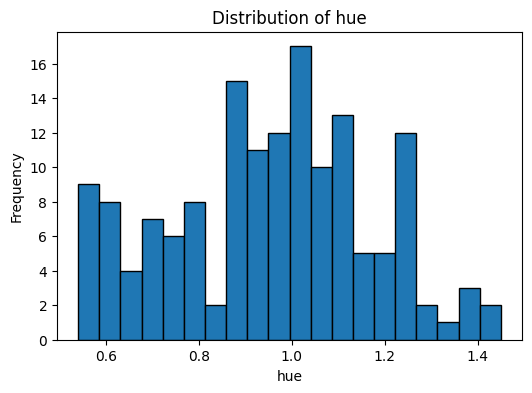

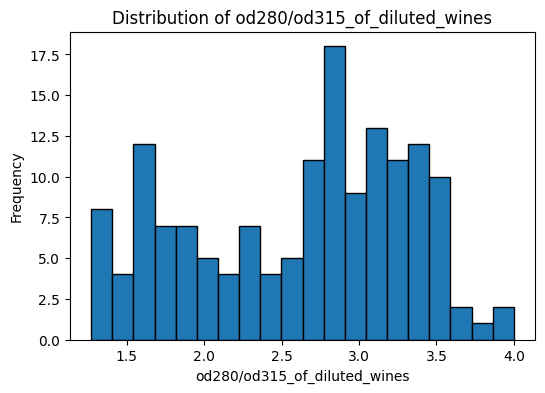

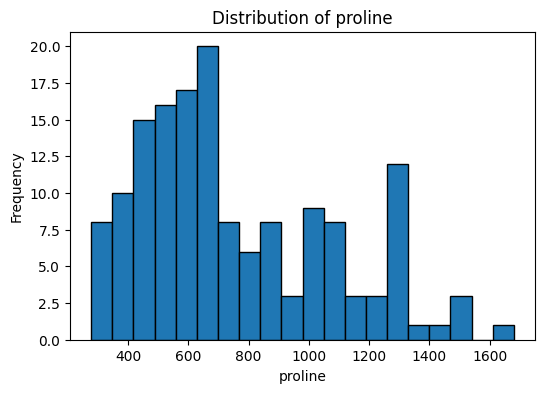

In [92]:
import matplotlib.pyplot as plt
features_to_visualize = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

for feature in features_to_visualize:
    plt.figure(figsize=(6, 4))
    plt.hist(wine_df[feature], bins=20, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# Data Preprocessing

* Data Splitting

In [93]:
from sklearn.model_selection import train_test_split
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **POPRAWA**-  "metodę fit_trnsform skalera stosuje się tylko do danych uczących; w przypadku danych testowych stosowana jest metoda transform"

* Normalize data to range [0, 1]

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* For categorical features apply encoding labels

 Wine dataset doesn't have any categorical features -it consists of only numerical features, so label encoding isn't  applicable in this case.

# **POPRAWA**
-"nie można powiedzieć, że istnieje rozkład normalny cech, jeśli zilustrowano tylko trzy ze wszystkich" (2/2)

 -"nie ma analizy równowagi klas; należy to również wziąć pod uwagę przy wyborze rozkładu w  naiwnym Bayes" (2/2)


# Model Selection

Gaussian Naive Bayes assumes that each feature follows a normal distribution, making it a suitable choice for data that can take any value within a range, such as wine measurements. In this case, the features in the dataset display a near-normal distribution, with their values showing the expected shape on the graph. Additionally, the distribution of classes in the dataset is relatively balanced, which further supports the use of Naive Bayes.The model is simple and performs well due to this characteristic, as the data roughly meets the normality assumption, enabling effective classification.

# Train the Model

In [95]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

print("Prior Probabilities:", classifier.class_prior_)
print("\nMean for each feature and class:\n", classifier.theta_)
print("\nVariance for each feature and class:\n", classifier.var_)


Prior Probabilities: [0.31690141 0.40140845 0.28169014]

Mean for each feature and class:
 [[0.70953216 0.22145282 0.5828877  0.31672394 0.40193237 0.64130268
  0.55644632 0.32033543 0.47609001 0.32707717 0.47479675 0.69255189
  0.64489975]
 [0.33037858 0.22521171 0.47124496 0.50189908 0.28451564 0.44271022
  0.36805093 0.43098312 0.39173884 0.12157614 0.47205819 0.56101793
  0.19509767]
 [0.55184211 0.50254582 0.57272727 0.55219072 0.31711957 0.25017241
  0.09435654 0.61981132 0.24082278 0.50475133 0.16808943 0.14157509
  0.27462569]]

Variance for each feature and class:
 [[0.01736389 0.01606567 0.01607773 0.01717688 0.01322458 0.01548658
  0.00682428 0.01815575 0.01850868 0.01103738 0.00836187 0.01654503
  0.02828929]
 [0.02164992 0.04488743 0.02963835 0.03115031 0.03678789 0.0390474
  0.02338011 0.05794395 0.03646013 0.00582271 0.02935217 0.03224921
  0.01621338]
 [0.02131655 0.05337827 0.0084715  0.01400546 0.01316096 0.01622173
  0.00344585 0.05520737 0.01757971 0.04233015 0.0095

# Evaluation Metrics

# **POPRAWA**- "do analizy statystyk w pandas dostępna jest funkcja describe()"

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# defining scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# initializing an empty dictionary to store results
cv_scores = {}

# performing cross-validation to get a more reliable estimate of model's performance
for metric_name, scorer in scoring.items():
    # calculating cross-validation scores for the current metric
    cv_scores[metric_name] = cross_val_score(classifier, X, y, cv=5, scoring=scorer)


cv_scores_df = pd.DataFrame(cv_scores)
print(cv_scores_df.describe())

# making predictions on the test set
y_pred = classifier.predict(X_test)

# Calculating metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


       accuracy  precision    recall  f1_score
count  5.000000   5.000000  5.000000  5.000000
mean   0.966349   0.969586  0.966349  0.966031
std    0.023628   0.021064  0.023628  0.024016
min    0.942857   0.949106  0.942857  0.942165
25%    0.944444   0.950000  0.944444  0.943525
50%    0.972222   0.974074  0.972222  0.972097
75%    0.972222   0.974747  0.972222  0.972369
max    1.000000   1.000000  1.000000  1.000000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


Cross-validation metrics:

    Average Accuracy (0.966349):
        An average accuracy indicates that the model is performing very well.

    Average Precision (0.969586):
        An average precision suggests small number of false positives

    Average Recall (0.966349):
         An average recall  suggests small number of positive negatives
    Average F1 Score (0.966031):
       An average F1 score suggests that the model has a good ratio of recall and precision .

Test set metrics:

    Accuracy (1.0000):
        A perfect accuracy of 100% means that the model correctly classified every instance in the test set.It may raise concerns about overfitting.
    Precision (1.0000):
        There were no false positives.

    Recall (1.0000):
       There were no false negatives.

    F1 Score (1.0000):
        A perfect F1 score of 100% means the model achieved the best possible balance between precision and recall

# Confusion Matrix

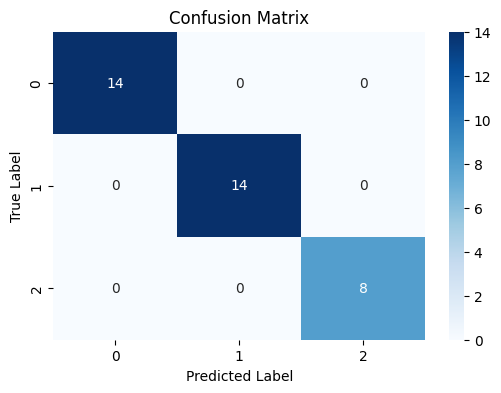

In [97]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The model correctly predicted class 0 in 14 instances.

The model correctly predicted class 1 in 14 instances.

The model correctly predicted class 2 in 8 instances.

There are no misclassification. It might indicate that the model is overfitting to the test set, but it is also possible that the classification task is relatively easy for the model.The cross-validation accuracy of 0.966349 suggests that the model is performing well on different subsets of the training data, which reduces the risk of overfitting. However, the perfect test set accuracy compared to the average cross-validation score could still signal some risk of overfitting.


## **POPRAWA**- "ocenę ważności cech należy przeprowadzić na całym zbiorze danych, a nie na zbiorze testowym"

# Feature Impact Analysis

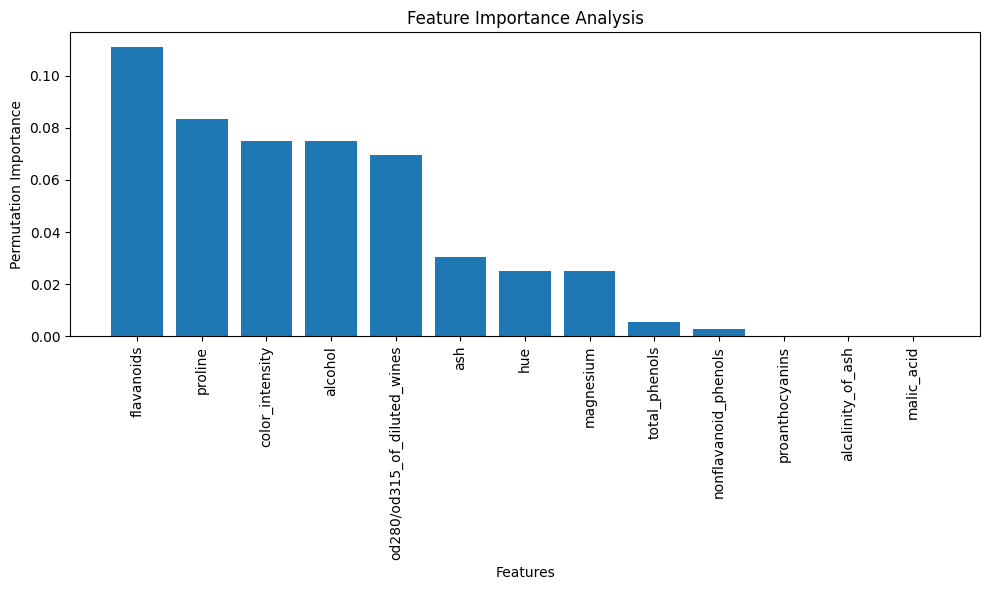

In [101]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

importances = result.importances_mean
sorted_idx = importances.argsort()[::-1]
features = wine.feature_names

plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), importances[sorted_idx])
plt.xticks(range(X_test.shape[1]), [features[i] for i in sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.title("Feature Importance Analysis")
plt.tight_layout()
plt.show()


contribiution to the classification decision:
   * the most: flavanoids
   * the least: malic_acid, alcalinity_of_ash, proanthocyamins

  


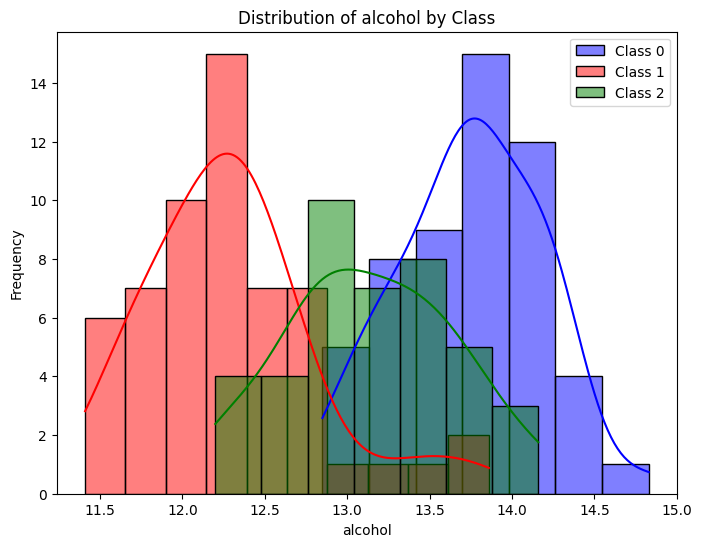

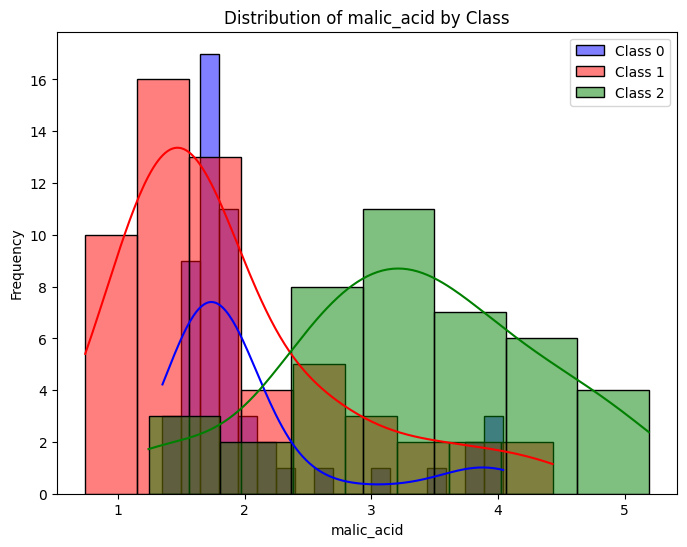

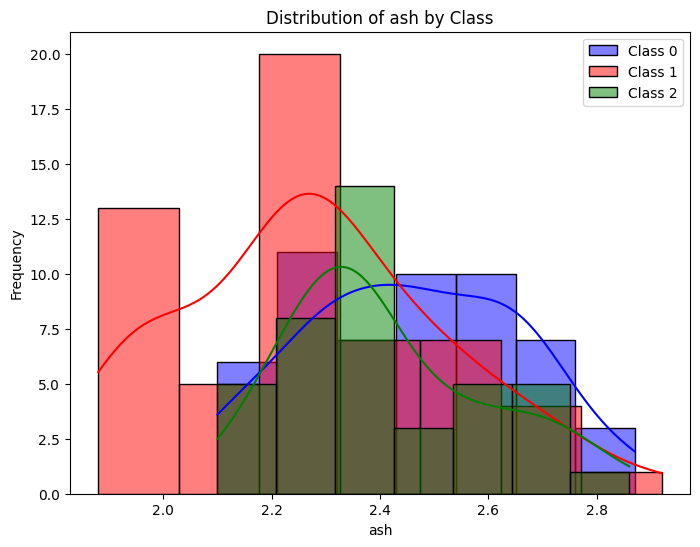

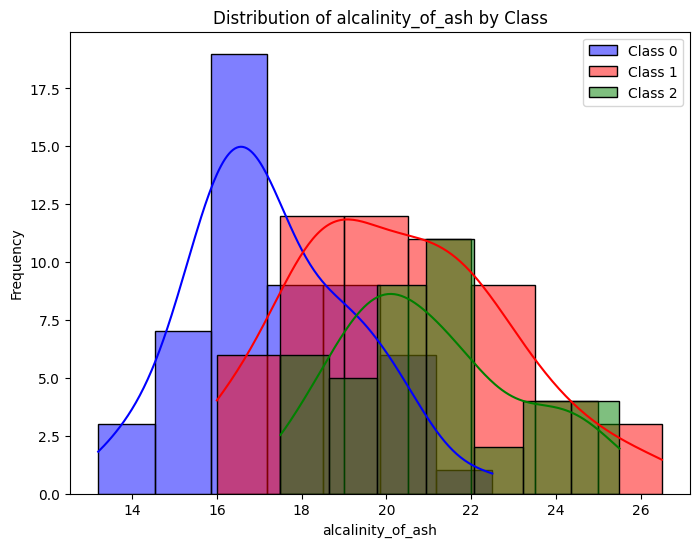

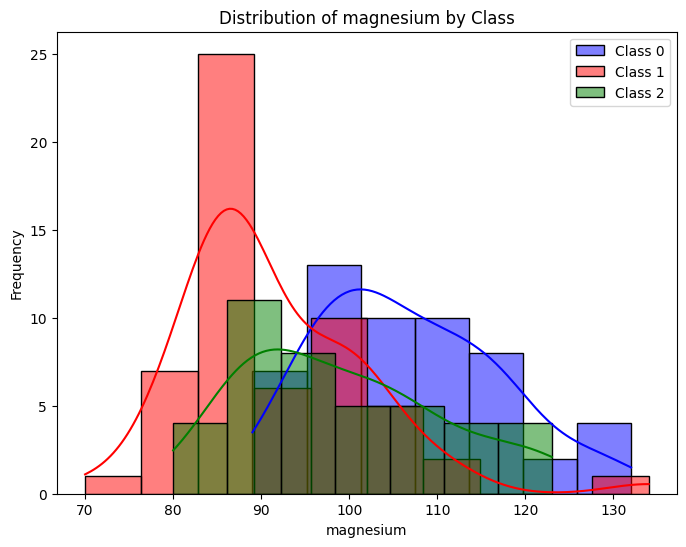

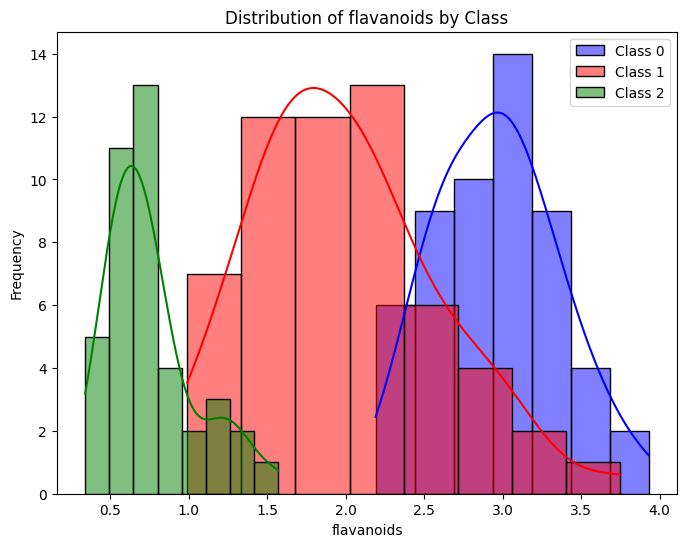

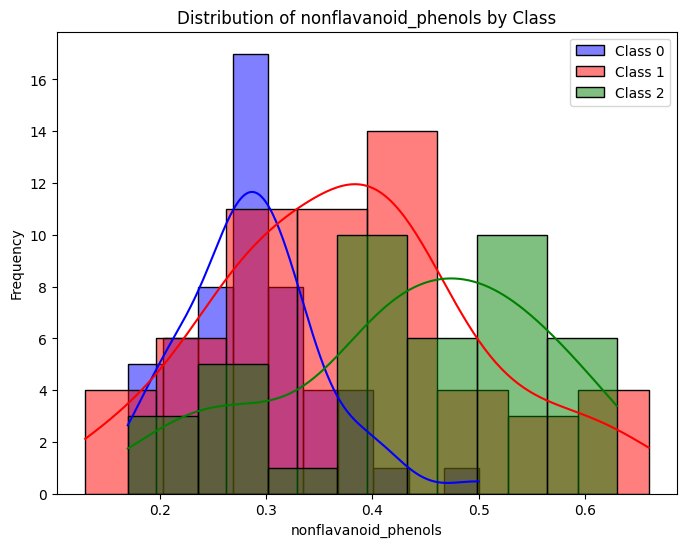

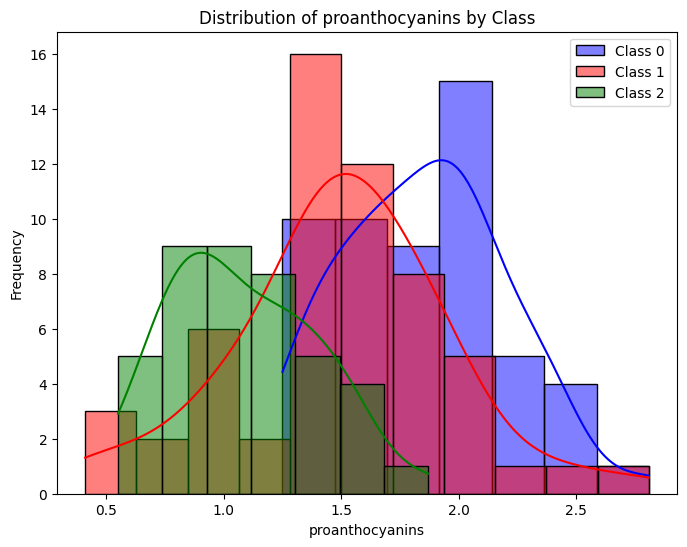

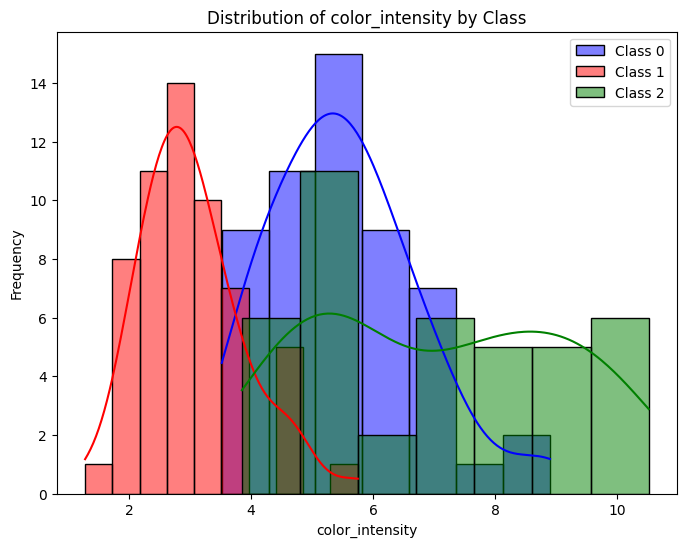

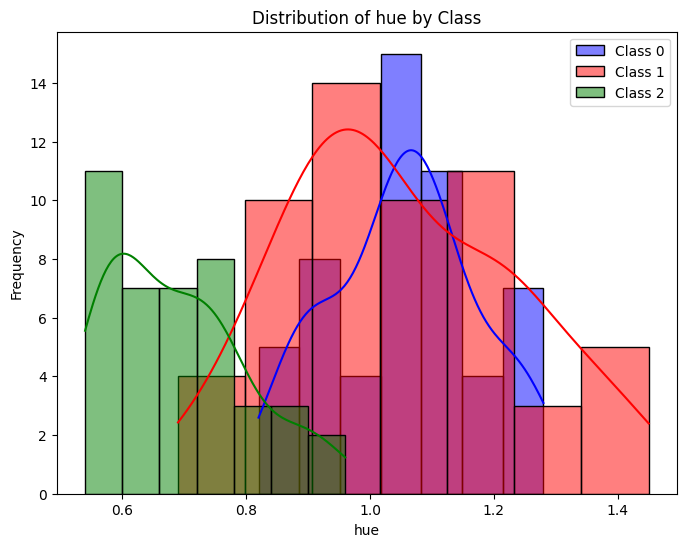

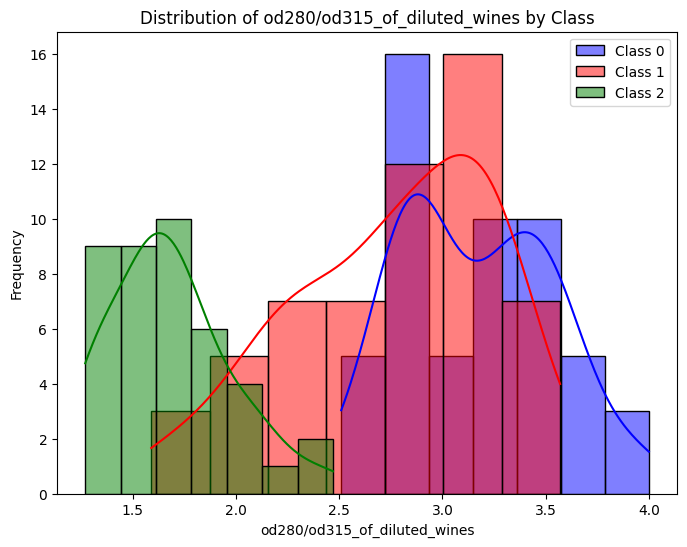

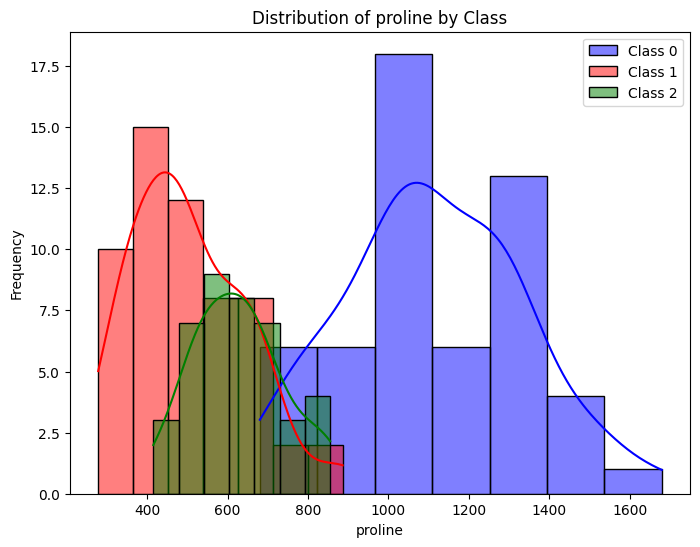

In [103]:
class_0_data = wine_df[wine_df['target'] == 0]
class_1_data = wine_df[wine_df['target'] == 1]
class_2_data = wine_df[wine_df['target'] == 2]


features = wine_df.columns[:-1]
for feature in features:
       plt.figure(figsize=(8, 6))
       sns.histplot(class_0_data[feature], label='Class 0', color='blue', kde=True)
       sns.histplot(class_1_data[feature], label='Class 1', color='red', kde=True)
       sns.histplot(class_2_data[feature], label='Class 2', color='green', kde=True)
       plt.title(f'Distribution of {feature} by Class')
       plt.xlabel(feature)
       plt.ylabel('Frequency')
       plt.legend()
       plt.show()

In [106]:
# grouping data by class
grouped = wine_df.groupby('target')

# calculating the mean value of each feature for each class
means = grouped.mean()

# calculating the percentage change in the mean for each feature between classes
percentage_changes = {}
for feature in means.columns:
    percentage_changes[feature] = {}
    for class1 in means.index:
        for class2 in means.index:
            if class1 != class2:
                change = (means.loc[class2, feature] - means.loc[class1, feature]) / means.loc[class1, feature] * 100
                percentage_changes[feature][f'{class1}_to_{class2}'] = change

for feature, changes in percentage_changes.items():
    print(f'\nPercentage changes for feature: {feature}')
    for change_key, change_value in changes.items():
        print(f'{change_key}: {change_value:.2f}%')


Percentage changes for feature: alcohol
0_to_1: -10.63%
0_to_2: -4.46%
1_to_0: 11.90%
1_to_2: 6.91%
2_to_0: 4.67%
2_to_1: -6.46%

Percentage changes for feature: malic_acid
0_to_1: -7.07%
0_to_2: 63.76%
1_to_0: 7.61%
1_to_2: 76.22%
2_to_0: -38.93%
2_to_1: -43.25%

Percentage changes for feature: ash
0_to_1: -7.30%
0_to_2: -1.92%
1_to_0: 7.87%
1_to_2: 5.80%
2_to_0: 1.95%
2_to_1: -5.49%

Percentage changes for feature: alcalinity_of_ash
0_to_1: 17.43%
0_to_2: 21.80%
1_to_0: -14.84%
1_to_2: 3.72%
2_to_0: -17.90%
2_to_1: -3.59%

Percentage changes for feature: magnesium
0_to_1: -14.47%
0_to_2: -7.04%
1_to_0: 16.91%
1_to_2: 8.68%
2_to_0: 7.57%
2_to_1: -7.99%

Percentage changes for feature: flavanoids
0_to_1: -32.61%
0_to_2: -74.44%
1_to_0: 48.40%
1_to_2: -62.08%
2_to_0: 291.30%
2_to_1: 163.68%

Percentage changes for feature: nonflavanoid_phenols
0_to_1: 31.13%
0_to_2: 52.88%
1_to_0: -23.74%
1_to_2: 16.59%
2_to_0: -34.59%
2_to_1: -14.23%

Percentage changes for feature: proanthocyanins
0_

(Acorrding to my analysis)  
The features most indicative of each class transition:

* 0_to_1: proline

* 0_to_2: flavanoids

* 1_to_0: proline

* 1_to_2: color_intensity

* 2_to_0: flavanoids

* 2_to_1: flavanoids

# Conclusion and Insights

The Naive Bayes model performs well, with cross-validation metrics remaining high, suggesting good generalization despite the 100% test accuracy, which could indicate overfitting. Gaussian Naive Bayes works well here as it assumes features follow a normal distribution, fitting the wine measurement data.


cross-validation metrics:

    Average Accuracy (0.966349):
        An average accuracy indicates that the model is performing very well.

    Average Precision (0.969586):
        An average precision suggests small number of false positives

    Average Recall (0.966349):
         An average recall  suggests small number of positive negatives
    Average F1 Score (0.966031):
       An average F1 score suggests that the model has a good ratio of recall and precision .

Test set metrics:

    Accuracy (1.0000):
        A perfect accuracy of 100% means that the model correctly classified every instance in the test set.It may raise concerns about overfitting.
    Precision (1.0000):
        There were no false positives.

    Recall (1.0000):
       There were no false negatives.

    F1 Score (1.0000):
        A perfect F1 score of 100% means the model achieved the best possible balance between precision and recall

The model correctly predicted:

    Class 0: 14 instances.
    Class 1: 14 instances.
    Class 2: 8 instances.

No misclassifications suggest strong performance, but also potential overfitting. Cross-validation accuracy of 0.966349 reduces this risk.

Key Features:

Most influential: flavonoids

Least influential: Malic acid, alkalinity of ash,proanthocyamins

Most influential for each class(!my opinion!)

class 0: Flavonoids, proline

class 1:proline,color_intensity, flavanoids

class 2:flavanoids,color_intensity
